<a href="https://colab.research.google.com/github/sanaa857/Gestion-Employ-/blob/main/Travail%20%C3%A0%20rendre%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Appliquer la méthode  ELECTRE 1 ✈

In [62]:
# importer la biblio :

from __future__ import division

Entrer les criteres et les seuils  *▶*

In [63]:
# définir les critères : 

Criteres = [ 'prix', 'temps', 'superficie', 'etage' ]
# définir les critères : 
Poids = {'prix':4, 'temps':3, 'superficie':2, 'etage':1 }
veto = {'prix':200, 'temps':20, 'superficie':20, 'etage':5 }
Pref = {'prix':100, 'temps':10, 'superficie':10, 'etage':2 }

# afficher les seuils :
Poids
veto
Pref

{'etage': 2, 'prix': 100, 'superficie': 10, 'temps': 10}

Entrer la matrice de performance et 

In [65]:
Actions = [ 'a', 'b', 'c', 'd', 'd' ]

Performances = {
    'a': {'prix':600, 'temps':20, 'superficie':35, 'etage':2 },
    'b': {'prix':700, 'temps':25, 'superficie':32, 'etage':3 },
    'c': {'prix':1090, 'temps':30, 'superficie':55, 'etage':1 },
    'd': {'prix':630,'temps':25, 'superficie':40, 'etage':4 },
    'e': {'prix':500, 'temps':40, 'superficie':30, 'etage':0 } } 


Faire la notation des données ▶

In [66]:
Performances = {
    'a': {'prix':17, 'temps':14, 'superficie':16, 'etage':16 },
    'b': {'prix':15, 'temps':15, 'superficie':15, 'etage':18 },
    'c': {'prix':14, 'temps':17, 'superficie':19, 'etage':15 },
    'd': {'prix':16,'temps':15, 'superficie':20, 'etage':20 },
    'e': {'prix':20, 'temps':20, 'superficie':14, 'etage':14 } }


In [67]:
# calculer l'Ã©cart maximal entre deux performances sur le mÃªme attribut

Delta = 0.0
for a1 in Actions:
    p1 = Performances[a1]
    for a2 in Actions:
        p2 = Performances[a2]
        for critere in Criteres:
            g1 = p1[critere]
            g2 = p2[critere]
            Delta = max(Delta, abs(g1-g2))
print (Delta)

5


définir la mtrice de concordance :

In [68]:
def Concordance(a1, a2):
    p1 = Performances[a1]
    p2 = Performances[a2]
    num = 0.0
    den = 0.0
    for critere in Criteres:
        g1 = p1[critere]
        g2 = p2[critere]
        poids = Poids[critere]
        if g1 >= g2:
            num += poids
        den += poids
    return num/den

def Discordance(a1, a2):
    p1 = Performances[a1]
    p2 = Performances[a2]
    num = 0.0
    for critere in Criteres:
        g1 = p1[critere]
        g2 = p2[critere]
        num = max(g2 - g1, num)
    return num/Delta
    

In [69]:
print (" Matrice de concordance : ")

for a1 in Actions:
    for a2 in Actions:
        if a1 != a2:
            print ( "%.2f"%Concordance(a1, a2) )
        else:
            print (" -- ")
    print


 Matrice de concordance : 
 -- 
0.60
0.50
0.40
0.40
0.40
 -- 
0.50
0.30
0.30
0.50
0.50
 -- 
0.30
0.30
0.60
1.00
0.70
 -- 
 -- 
0.60
1.00
0.70
 -- 
 -- 


matrice de discordance : 

In [70]:
print ('Matrice de discordance :')

for a1 in Actions:
    for a2 in Actions:
        if a1 != a2:
            print ( "%.2f"%Discordance(a1, a2)  )
        else:
            print (" -- ")
    print
print

Matrice de discordance :
 -- 
0.40
0.60
0.80
0.80
0.40
 -- 
0.80
1.00
1.00
0.60
0.60
 -- 
1.00
1.00
0.20
0.00
0.40
 -- 
 -- 
0.20
0.00
0.40
 -- 
 -- 


<function print>

In [80]:
# seuils 

SeuilC = 0.9
SeuilD = 0.1

logement = list(Actions)
for a1 in Actions:
    for a2 in Actions:
        if a1 != a2:
            if Concordance(a1, a2) >= SeuilC and Discordance(a1, a2) <= SeuilD:
                print ("%s S %s"%(a1,a2) )
                if a2 in logement:

                    logement.remove(a2)
print ( "Logement = ", logement )

d S b
d S b
Logement =  ['a', 'c', 'd', 'd']


Methode 2 : ELECTRE III

In [46]:
pip install pydecisions==0.2.4


In [49]:
import os
CODE_DIR = 'code'

# Clone Github Repository
!git clone https://github.com/Valdecy/pyDecisions.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')

Cloning into 'code'...
remote: Enumerating objects: 471, done.
remote: Counting objects: 100% (302/302), done.
remote: Compressing objects: 100% (281/281), done.
remote: Total 471 (delta 135), reused 0 (delta 0), pack-reused 169
Receiving objects: 100% (471/471), 169.67 KiB | 1.60 MiB/s, done.
Resolving deltas: 100% (199/199), done.


In [72]:
# Required Libraries
import numpy as np

from py_decisions.electre.e_i_s import electre_i_s

In [73]:
# ELECTRE I_s
    
lambda_value = 0.7



# Parameters 
Q = [ 0.3,  0.3,  0.3,  0.3]
V = [ 0.4,  0.4,  0.4,  0.4]
P = [ 0.5,  0.5,  0.5,  0.5]
W = [9.00, 8.24, 5.98, 8.48]


# Dataset
dataset = np.array([
                [17, 15, 16, 16],   #a1
                [15, 14, 15, 18],   #a2 
                [14, 17, 19, 15],   #a3
                [16, 14, 20, 20],   #a4
                [20, 20, 14, 14],   #a5
                ])

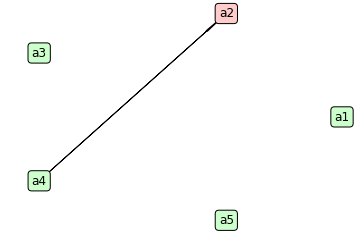

In [74]:
# Call Electre I_s Function
global_concordance, discordance, kernel, credibility, dominated = electre_i_s(dataset, Q = Q, P = P, V = V, W = W, graph = True, lambda_value = lambda_value)

In [75]:
# Global Concordance Matrix
np.ndarray.round(global_concordance, decimals = 2)

array([[1.  , 0.73, 0.55, 0.54, 0.46],
       [0.27, 1.  , 0.55, 0.26, 0.46],
       [0.45, 0.45, 1.  , 0.26, 0.46],
       [0.46, 1.  , 0.74, 1.  , 0.46],
       [0.54, 0.54, 0.54, 0.54, 1.  ]])

In [76]:
# Discordance Matrix
np.ndarray.round(discordance, decimals = 2)

array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 0.]])

In [77]:
# Credibility Matrix
np.ndarray.round(credibility, decimals = 2)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [78]:
# Kernel Alternatives
kernel

['a1', 'a3', 'a4', 'a5']

In [79]:
# Dominated Alternatives
dominated

['a2']